# sommelier.ai
#### Practical Machine Learning Workshop

### Agenda:
- Data Exploration with pandas
- Modeling with scikit-learn

### Documentation
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) docs
- [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro.html) blog series
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [matplotlib](https://matplotlib.org/api/api_overview.html)

## Data Exploration

In [1]:
# These 'magics' alter the behavior of the Jupyter notebook
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

In [3]:
# This cell is all for styling graphs

import matplotlib.pyplot as plt
import seaborn as sns

from workshop import boxplot_sorted

sns.set(style="darkgrid")
plt.style.use("fivethirtyeight")

# https://matplotlib.org/tutorials/introductory/customizing.html
plt.rc("figure", figsize=(11, 8))

FONT_SIZE = 16

plt.rc("font", size=FONT_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=FONT_SIZE)     # fontsize of the x and y labels
plt.rc("xtick", labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=FONT_SIZE)    # legend fontsize
plt.rc("figure", titlesize=FONT_SIZE)   # fontsize of the figure title

In [130]:
wine_reviews: Path = Path.cwd() / "data" / "winemag-data.zip"

df: pd.DataFrame = pd.read_csv(wine_reviews)

# Display the first few elements
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord


In [5]:
len(df)

116973

## Indexing

- Use `.loc` for label-based indexing
- Use `.iloc` for positional indexing

You can omit these, but the [Zen Of Python](https://www.python.org/dev/peps/pep-0020/) say __explicit is better than implicit__ and there is a performance penalty from pandas having to infer which indexing method to use.

In [6]:
df.loc[(df.province == "Washington") & (df.points > 98)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58548,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse
94349,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
106271,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek


In [7]:
df.iloc[15:18]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
15,Italy,"Oak, toast, leafy underbrush and steeped plum ...",Amedeo,86,108.0,Central Italy,Montefalco Sagrantino,NaN,Kerin O’Keefe,@kerinokeefe,Signae 2007 Amedeo (Montefalco Sagrantino),Sagrantino,Signae
16,Germany,Pristine grapefruit and lemon are cloaked in s...,NaN,88,12.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Carl Graff 2015 Riesling (Mosel),Riesling,Carl Graff
17,France,Givry is one of the unsung values in Burgundy....,NaN,90,35.0,Burgundy,Givry,NaN,Roger Voss,@vossroger,Antonin Rodet 2010 Givry,Pinot Noir,Antonin Rodet


In [25]:
df.iloc[15:18]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,word_count
15,Italy,"Oak, toast, leafy underbrush and steeped plum ...",Amedeo,86,108.0,Central Italy,Montefalco Sagrantino,NaN,Kerin O’Keefe,@kerinokeefe,Signae 2007 Amedeo (Montefalco Sagrantino),Sagrantino,Signae,38
16,Germany,Pristine grapefruit and lemon are cloaked in s...,NaN,88,12.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Carl Graff 2015 Riesling (Mosel),Riesling,Carl Graff,36
17,France,Givry is one of the unsung values in Burgundy....,NaN,90,35.0,Burgundy,Givry,NaN,Roger Voss,@vossroger,Antonin Rodet 2010 Givry,Pinot Noir,Antonin Rodet,44


In [21]:
# Selecting columns
df[["country", "winery"]]

,country,winery
0,US,Baer
1,US,Coghlan
2,France,Domaine de Roche Guillon
3,France,Domaine de Cause
4,Spain,Pinord
...,...,...
116968,France,Domaine Vincent Stoeffler
116969,France,Gosset
116970,US,Dion
116971,US,Black Stallion


## How are wines scored?

In [9]:
df.points.describe()

count    116973.000000
mean         88.446539
std           3.038423
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

<AxesSubplot:title={'center':'Points'}, ylabel='Frequency'>

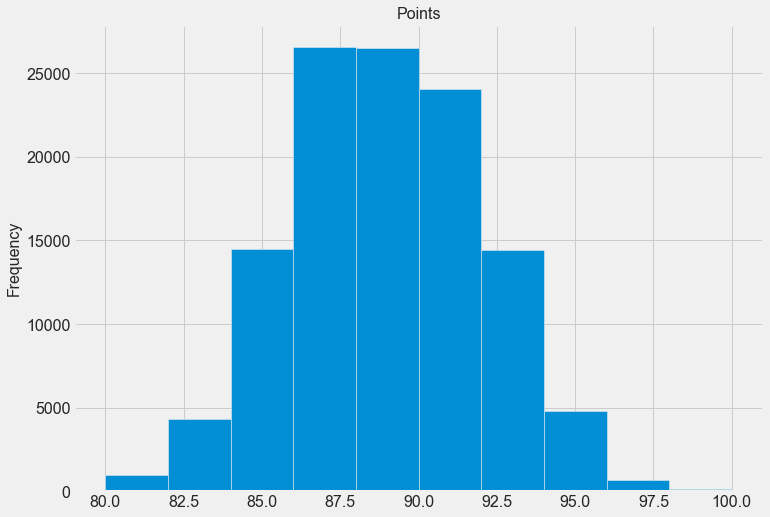

In [10]:
df.points.plot.hist(title="Points")

### How long are descriptions?

This examples shows creating a new column and using the "str" extension for [working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [11]:
df["word_count"] = df["description"].str.split().apply(len)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,word_count
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer,31
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan,37
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon,31
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause,33
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116968,France,Called “Apiana” because Muscat is attractive t...,Uva Apiana,87,NaN,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Vincent Stoeffler 2010 Uva Apiana Musc...,Muscat,Domaine Vincent Stoeffler,27
116969,France,This is a soft Champagne—more like a wine with...,Grand Rosé Brut,91,85.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Gosset NV Grand Rosé Brut (Champagne),Champagne Blend,Gosset,44
116970,US,"This pleasant, easy-drinking wine from five di...",NaN,87,25.0,Oregon,Chehalem Mountains,Willamette Valley,Paul Gregutt,@paulgwine,Dion 2015 Pinot Noir (Chehalem Mountains),Pinot Noir,Dion,29
116971,US,"So insanely rich and ripe, it's practically a ...",Bucephalus,90,150.0,California,Napa Valley,Napa,NaN,NaN,Black Stallion 2009 Bucephalus Red (Napa Valley),Red Blend,Black Stallion,50


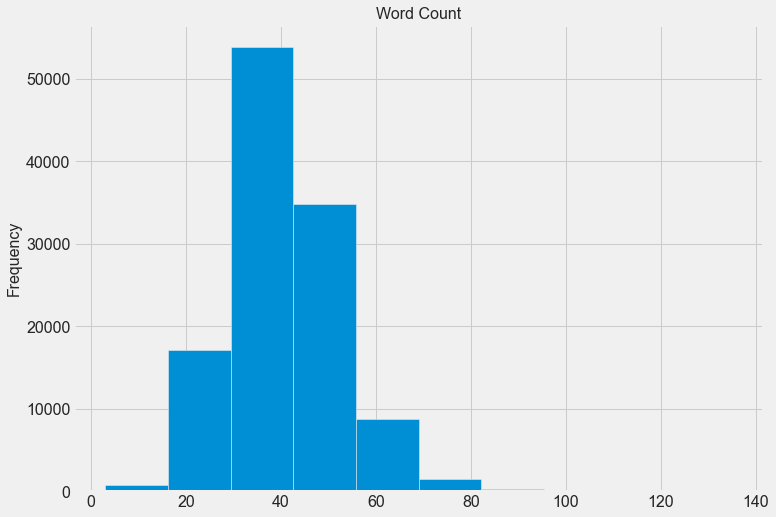

In [12]:
df["word_count"].plot.hist(title="Word Count");

In [13]:
# Gets the longest description by word count.
df.iloc[df.word_count.idxmax].description

"This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, with some acidic bitterness in the finish. The flavors are of black currants and smoky new oak. The Morisoli Vineyard has been home to very good, ageable bottlings from the likes of Sequoia Grove and Elyse, but in the last few years, Meander has expressed its terroir best. Try after 2012.This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, with some acidic bitterness in the finish. The flavors are of black currants and smoky new oak. The Morisoli Vineyard has been home to very good, ageable bottlings from the likes of Sequoia Grove and Elyse, but in the last few years, Meander has expressed its terroir best. Try after 2012."

In [14]:
df.iloc[df.word_count.idxmin].description

'Imported by Kobrand.'

## What are the most common words used to describe wines?

In [18]:
%%time

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(df["description"])
term_df = pd.DataFrame.sparse.from_spmatrix(document_term_matrix, columns=vectorizer.get_feature_names())
term_df

CPU times: user 4.18 s, sys: 107 ms, total: 4.29 s
Wall time: 4.3 s


,000,008,01,02,03,030,035,04,04s,05,...,élévage,émilion,étoile,été,öküzgözü,über,überaromatic,ürzig,ürziger,žilavka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
count_df.sum().sort_values(ascending=False).head(80)

and          313275
the          199282
of           155629
with         108450
this         102816
              ...  
raspberry      8563
firm           8314
some           8093
peach          7847
chocolate      7746
Length: 80, dtype: int64

In [51]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
with pd.option_context("display.max_rows", 100):
    # display is what is used to show an item when it is last element in a cell.
    display(count_df.sum().sort_values(ascending=False).head(80))

and           313275
the           199282
of            155629
with          108450
this          102816
is             87124
it             77607
wine           72414
flavors        56587
in             56318
to             50500
fruit          45038
on             41024
that           36423
aromas         35645
palate         34554
acidity        31486
finish         31430
from           29419
but            28193
tannins        27816
drink          27306
cherry         26303
black          26082
ripe           24658
are            23339
has            22335
red            19660
for            19648
by             18587
spice          17258
notes          17153
as             16411
an             16400
its            16154
oak            16001
fresh          15773
rich           15747
dry            15550
now            15339
berry          15243
nose           15197
full           14513
plum           13419
soft           12299
fruits         12240
apple          12193
well         

In [62]:
# Another command option is setting the max_colwidth to see the complete contents.
with pd.option_context("display.max_colwidth", -1):
    display(df["description"].tail(10))

116963    Ripe, juicy white peach and honeydew flavors are fleshy and plump on this richly textured dry Riesling. It's undeniably opulent in style, but soft acidity and a crystalline edge of minerality drive a long, elegant finish. Gorgeously balanced.                                              
116964    Concentrated tannins give this wine from organic grapes a powerful structure. For balance, it also has a more fruity character that offers blackberry and black plums. The dense texture means it needs to age until 2015.                                                                      
116965    The texture could be smoother on this Chardonnay, as it's all sharp knees and elbows. But it shows proper ripeness, with orange, green apple and tropical fruit flavors, as well as plenty of sweet vanilla, cream and buttered toast.                                                          
116966    This is a proper Cabernet, showing some rich flavors of black currants and dark chocolate, wr

## Aside: `inplace=True`

Pandas maintainers say don't use it. They are [trying to deprecate it](https://github.com/pandas-dev/pandas/issues/16529).

![caption](images/inplace.png)

## How many tasters are there?

In [73]:
len(df.taster_name.unique())

20

In [78]:
# Need to be careful of dropna across several different methods, like value_counts.
df.taster_name.value_counts()

Unknown               23565
Roger Voss            23058
Michael Schachner     13590
Kerin O’Keefe          9643
Virginie Boone         8599
Paul Gregutt           8560
Matt Kettmann          5690
Joe Czerwinski         4634
Sean P. Sullivan       4496
Anna Lee C. Iijima     3986
Jim Gordon             3784
Anne Krebiehl MW       3311
Lauren Buzzeo          1638
Susan Kostrzewa         988
Mike DeSimone           464
Jeff Jenssen            440
Alexander Peartree      373
Carrie Dykes            126
Fiona Adams              23
Christina Pickard         5
Name: taster_name, dtype: int64

In [26]:
# Need to be careful of dropna across several different methods, like value_counts.
df.taster_name.value_counts(dropna=False)

NaN                   23565
Roger Voss            23058
Michael Schachner     13590
Kerin O’Keefe          9643
Virginie Boone         8599
Paul Gregutt           8560
Matt Kettmann          5690
Joe Czerwinski         4634
Sean P. Sullivan       4496
Anna Lee C. Iijima     3986
Jim Gordon             3784
Anne Krebiehl MW       3311
Lauren Buzzeo          1638
Susan Kostrzewa         988
Mike DeSimone           464
Jeff Jenssen            440
Alexander Peartree      373
Carrie Dykes            126
Fiona Adams              23
Christina Pickard         5
Name: taster_name, dtype: int64

In [75]:
# Setting a value with a row and column indexer.
df.loc[df.taster_name.isna(), "taster_name"] = "Unknown"

In [76]:
df.taster_name.value_counts()

Unknown               23565
Roger Voss            23058
Michael Schachner     13590
Kerin O’Keefe          9643
Virginie Boone         8599
Paul Gregutt           8560
Matt Kettmann          5690
Joe Czerwinski         4634
Sean P. Sullivan       4496
Anna Lee C. Iijima     3986
Jim Gordon             3784
Anne Krebiehl MW       3311
Lauren Buzzeo          1638
Susan Kostrzewa         988
Mike DeSimone           464
Jeff Jenssen            440
Alexander Peartree      373
Carrie Dykes            126
Fiona Adams              23
Christina Pickard         5
Name: taster_name, dtype: int64

## Data Challenges
- what are the worst wines in the US?
- what is the most produced variety?
- what is hightest rated variety?
- what are the most controversial wine varieties?
- what are the top 10 best value wines?
- given a taster, what are their favorite varieties?

## What are the top 20 wineries by number of wines? How do their points compare?

In [29]:
df.winery.isna().any()

False

In [47]:
# Get an index made up from the twenty most productive wineries (discard the value counts).
top20 = df.winery.value_counts()[:20].index
top20

Index(['Wines & Winemakers', 'DFJ Vinhos', 'Testarossa', 'Williams Selyem',
       'Chateau Ste. Michelle', 'Georges Duboeuf', 'Louis Latour',
       'Concha y Toro', 'Columbia Crest', 'Gary Farrell', 'Kendall-Jackson',
       'Siduri', 'Albert Bichot', 'Montes', 'Undurraga', 'Trapiche', 'Lynmar',
       'Jean-Luc and Paul Aegerter', 'V. Sattui', 'Robert Mondavi'],
      dtype='object')

In [43]:
# Method chaining is considered "good style" in pandas.
(df.loc[df.winery.isin(top20)]
   .groupby("winery")
   .points
   .quantile(0.95)
   .sort_values(ascending=False))

winery
Williams Selyem               97.00
Louis Latour                  95.00
Lynmar                        95.00
Gary Farrell                  95.00
Albert Bichot                 95.00
Testarossa                    94.00
Siduri                        94.00
Robert Mondavi                93.00
Kendall-Jackson               93.00
Jean-Luc and Paul Aegerter    93.00
Trapiche                      92.85
Montes                        92.00
V. Sattui                     92.00
Concha y Toro                 92.00
Wines & Winemakers            92.00
Undurraga                     91.00
Georges Duboeuf               91.00
DFJ Vinhos                    91.00
Columbia Crest                91.00
Chateau Ste. Michelle         91.00
Name: points, dtype: float64

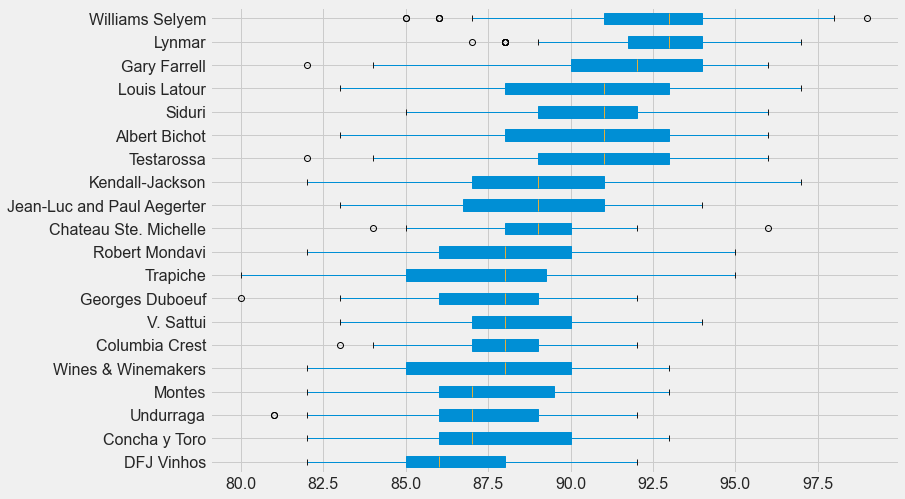

In [146]:
boxplot_sorted(df[df.winery.isin(top20)], by="winery", column="points");

## Are some tasters pickier than others?

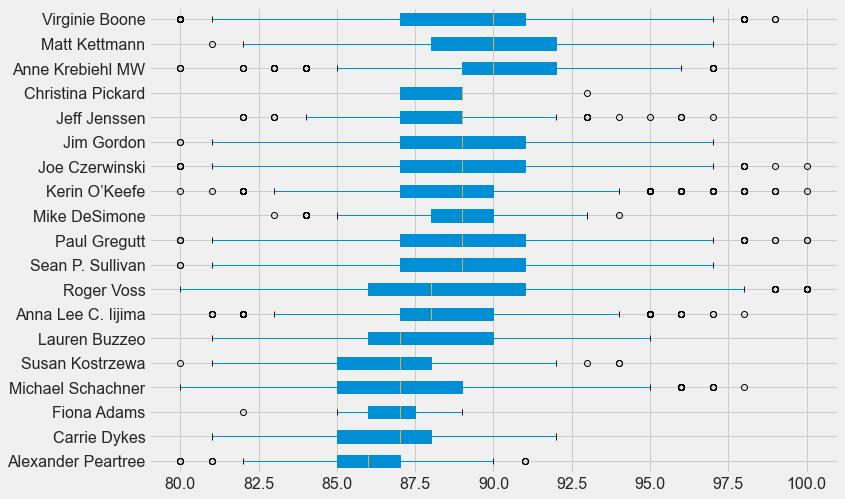

In [60]:
boxplot_sorted(df, by="taster_name", column="points");

In [144]:
def get_favorite_wines(name: str) -> pd.Series:
    return (df.loc[df.taster_name == name]
              .groupby("variety")
              .points
              .quantile(0.95)
              .sort_values(ascending=False)
              .head())

get_favorite_wines("Virginie Boone")

variety
Shiraz                94.85
Syrah-Grenache        94.50
Cabernet Sauvignon    94.00
Sparkling Blend       94.00
Syrah                 94.00
Name: points, dtype: float64

In [143]:
get_favorite_wines("Alexander Peartree")

variety
Merlot             90.00
Touriga            90.00
Chardonnay         89.70
Sparkling Blend    89.65
Meritage           89.55
Name: points, dtype: float64

## Pop Quiz:
- What is the ten most produced variety?
- What are the ten most poorly rated varieties from Spain?

In [55]:
df.variety.value_counts(ascending=False).head(10)

Pinot Noir                  11948
Chardonnay                  10604
Cabernet Sauvignon           8536
Red Blend                    7991
Bordeaux-style Red Blend     6265
Riesling                     4666
Sauvignon Blanc              4464
Syrah                        3726
Rosé                         3244
Merlot                       2790
Name: variety, dtype: int64

In [133]:
df.loc[df.country == "Spain"].groupby("variety").points.quantile(0.95).sort_values().head(10)

variety
Malvar               81.0
Picapoll             82.0
Riesling             82.0
Tempranillo-Syrah    82.0
Airen                82.9
Forcallà             83.0
Viura-Verdejo        83.0
Alicante Bouschet    83.0
Paralleda            83.0
Premsal              83.0
Name: points, dtype: float64

## Extract Year from Title

In [100]:
def compute_year(df: pd.DataFrame) -> pd.DataFrame:
    # It is polite not to alter the input DataFrame
    result: pd.DataFrame = df.copy()

    year: pd.Series = df.title.str.extract(r"\b((?:19|20)\d{2})\b")

    # Get the median year
    median: int = round(df.year.dropna().astype(int).median())
    
    # Replace NaNs with the median
    result["year"] = year.replace(pd.NA, median).astype(int)

    return result

In [101]:
df.pipe(compute_year)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,word_count,year
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer,31,2014
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan,37,2010
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon,31,2013
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause,33,2011
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord,51,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116968,France,Called “Apiana” because Muscat is attractive t...,Uva Apiana,87,NaN,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Vincent Stoeffler 2010 Uva Apiana Musc...,Muscat,Domaine Vincent Stoeffler,27,2010
116969,France,This is a soft Champagne—more like a wine with...,Grand Rosé Brut,91,85.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Gosset NV Grand Rosé Brut (Champagne),Champagne Blend,Gosset,44,2011
116970,US,"This pleasant, easy-drinking wine from five di...",NaN,87,25.0,Oregon,Chehalem Mountains,Willamette Valley,Paul Gregutt,@paulgwine,Dion 2015 Pinot Noir (Chehalem Mountains),Pinot Noir,Dion,29,2015
116971,US,"So insanely rich and ripe, it's practically a ...",Bucephalus,90,150.0,California,Napa Valley,Napa,NaN,NaN,Black Stallion 2009 Bucephalus Red (Napa Valley),Red Blend,Black Stallion,50,2009


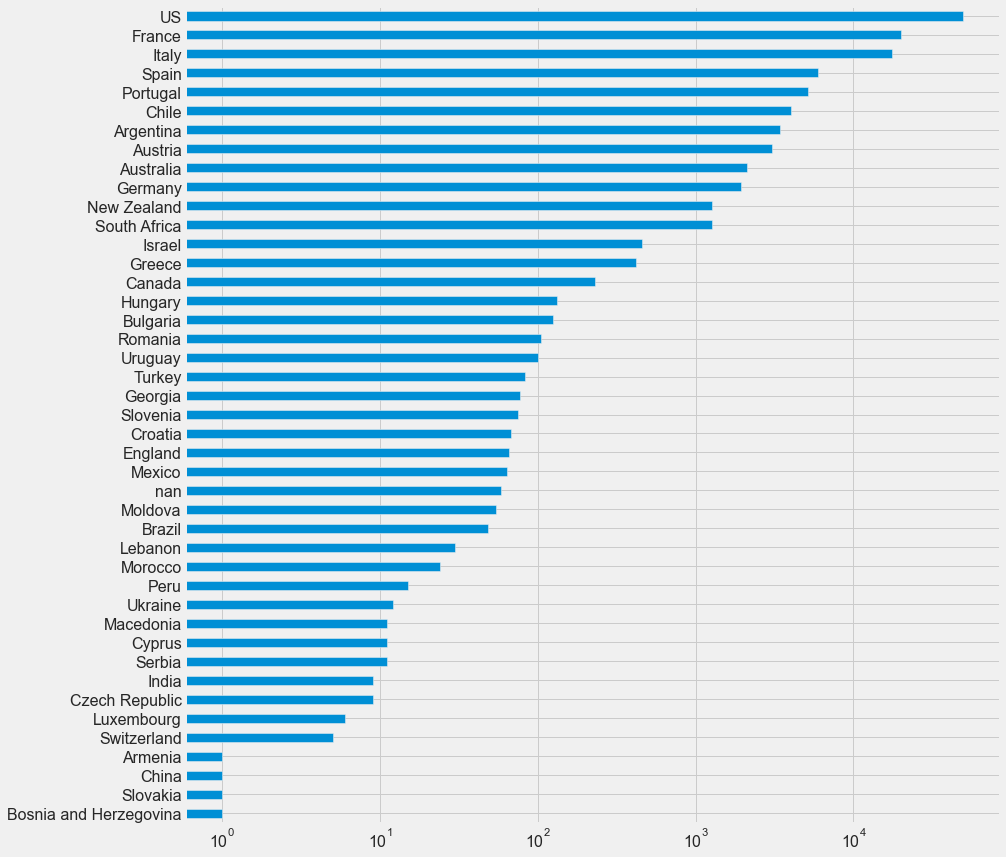

In [111]:
(df.country
   .value_counts(ascending=True, dropna=False)
   .plot.barh(figsize=(13,14), logx=True));

In [141]:
def get_favorite_wines(name: str) -> pd.Series:
    return (df[df.taster_name == name]
              .groupby("variety")
              .points
              .quantile(0.95)
              .sort_values(ascending=False)
              .head())

get_favorite_wines("Virginie Boone")

variety
Shiraz                94.85
Syrah-Grenache        94.50
Cabernet Sauvignon    94.00
Sparkling Blend       94.00
Syrah                 94.00
Name: points, dtype: float64

<AxesSubplot:ylabel='variety'>

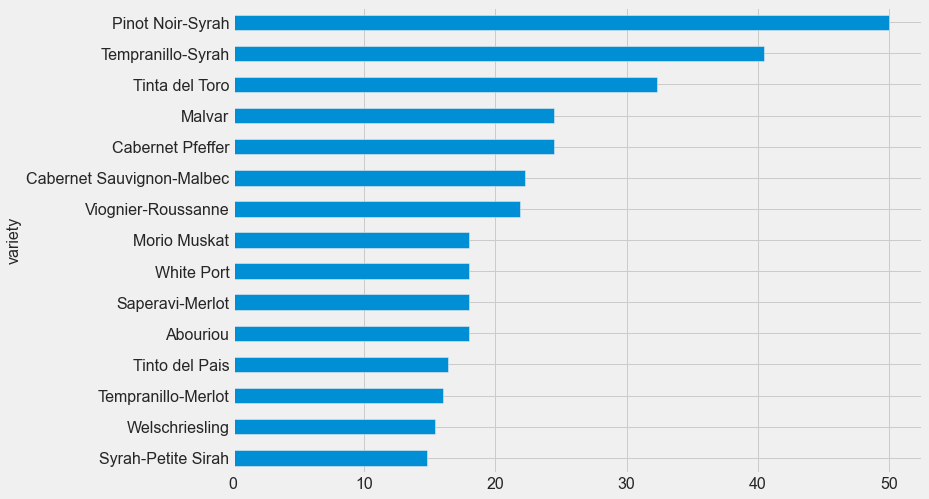

In [138]:
# Varieties with the most variance in points
(df.groupby("variety")
   .points
   .var()
   .dropna()
   .sort_values()
   .tail(15)
   .plot
   .barh());

In [ ]:
df.points.describe()

In [ ]:
df['is_good'] = df.points > 88

In [ ]:
from sklearn import metrics
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.preprocessing import *

from workshop import show_most_informative_features

def evaluate(model, X, y):
    predictions = model.predict(X)
    score = metrics.accuracy_score(y, predictions)
    print('\nAccuracy: %0.3f' % score)

    print(metrics.classification_report(y, predictions))

In [ ]:
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(columns=['is_good', 'price', 'points']), 
    df.is_good,
    random_state=3)

In [ ]:
%%time

count_model = make_pipeline(CountVectorizer(), MultinomialNB())

count_model.fit(train_df.description, train_labels)

evaluate(count_model, test_df.description, test_labels)

In [ ]:
%%time

tf_idf_model = make_pipeline(
            make_column_transformer(
                (TfidfVectorizer(ngram_range=(1,3)), "description")),
            SGDClassifier(n_jobs=-1, max_iter=1000))

tf_idf_model.fit(train_df, train_labels)

evaluate(tf_idf_model, test_df, test_labels)

In [ ]:
show_most_informative_features(tf_idf_model)

In [ ]:
%%time

categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                (TfidfVectorizer(), "description"),
                (categorical_transformer, categorical_features),
                (make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()), ["year"])),
            SGDClassifier(n_jobs=-1, max_iter=1000))

model.fit(train_df, train_labels)

predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))

In [ ]:
show_most_informative_features(model)

In [ ]:
def get_failures(model, X, y, cv=3):
    predicted = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)

    print("Confusion matrix (actual x prediction):")
    print(metrics.confusion_matrix(y, predicted))

    fn = X[(y == True) & (predicted == False)]
    fp = X[(y == False) & (predicted == True)]

    return fn, fp

In [ ]:
fn, tp = get_failures(model, train_df, train_labels)